In [31]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import hvplot.pandas
import hvplot.xarray
import cartopy.crs as ccrs
import geoviews as gv
import pyproj
import requests

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")



In [32]:
master_crime_df = pd.DataFrame()
for file in os.listdir(os.getcwd()):
    if file.endswith(".csv"):
        master_crime_df = master_crime_df.append(pd.read_csv(file))
master_crime_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
1,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified,NaN
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation,NaN
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect,NaN
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified,NaN
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation,NaN


In [33]:
master_crime_df.isna().sum()


Crime ID                  16454
Month                         0
Reported by                   0
Falls within                  0
Longitude                     0
Latitude                      0
Location                      0
LSOA code                     0
LSOA name                     0
Crime type                    0
Last outcome category     16454
Context                  292913
dtype: int64

In [34]:
master_crime_df.drop("Context",inplace=True,axis=1)
master_crime_df


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
1,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation


In [35]:
master_crime_df.dropna(how="any", inplace=True)

master_crime_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
5,32b5ba98624cd24da2413933265aaee270c68b111f691b...,2022-01,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham,Violence and sexual offences,Unable to prosecute suspect
6,2749744b442839d28fd2b0c472107fc6b7ca3e8406e077...,2022-01,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Birmingham,Vehicle crime,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation


In [36]:
crime_data = master_crime_df.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_data = crime_data[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code","Last outcome category", "Crime ID"]]
new_crime_data


,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID
2,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...
3,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...
4,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...
5,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Unable to prosecute suspect,32b5ba98624cd24da2413933265aaee270c68b111f691b...
6,Birmingham,2022-01,Vehicle crime,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Investigation complete; no suspect identified,2749744b442839d28fd2b0c472107fc6b7ca3e8406e077...
...,...,...,...,...,...,...,...,...,...,...,...
31692,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Under investigation,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...
31693,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Unable to prosecute suspect,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...
31694,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Investigation complete; no suspect identified,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...
31695,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Under investigation,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...


In [37]:
new_crime_data[["Last Outcome","Categoty"]] = new_crime_data["Last outcome category"].str.split(";",expand=True)
new_crime_data

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID,Last Outcome,Categoty
2,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,Investigation complete,no suspect identified
3,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,Investigation complete,no suspect identified
4,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,Unable to prosecute suspect,None
5,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Unable to prosecute suspect,32b5ba98624cd24da2413933265aaee270c68b111f691b...,Unable to prosecute suspect,None
6,Birmingham,2022-01,Vehicle crime,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Investigation complete; no suspect identified,2749744b442839d28fd2b0c472107fc6b7ca3e8406e077...,Investigation complete,no suspect identified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31692,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Under investigation,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,Under investigation,None
31693,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Unable to prosecute suspect,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,Unable to prosecute suspect,None
31694,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Investigation complete; no suspect identified,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,Investigation complete,no suspect identified
31695,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Under investigation,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,Under investigation,None


In [38]:
new_crime_data.loc[(new_crime_data["Last Outcome"]=="Investigation complete"),"New outcome"]="Complete with No Suspect"
new_crime_data.loc[(new_crime_data["Last Outcome"]=="Unable to prosecute suspect") |
                   (new_crime_data["Last Outcome"]=="Formal action is not in the public interest") |
                   (new_crime_data["Last Outcome"]=="Further action is not in the public interest") |
                   (new_crime_data["Last Outcome"]=="Further investigation is not in the public interest"),"New outcome"]="Complete but couldnt prosecute"
new_crime_data.loc[(new_crime_data["Last Outcome"]=="Local resolution") |
                   (new_crime_data["Last Outcome"]=="Offender given a caution") |
                   (new_crime_data["Last Outcome"]=="Suspect charged as part of another case") |
                   (new_crime_data["Last Outcome"]=="Action to be taken by another organisation") |
                   (new_crime_data["Last Outcome"]=="Court result unavailable"),"New outcome"]="Actioned or Punished"
new_crime_data.loc[(new_crime_data["Last Outcome"]=="Awaiting court outcome") |
                   (new_crime_data["Last Outcome"]=="Status update unavailable") |
                   (new_crime_data["Last Outcome"]=="Under investigation") ,"New outcome"]="Open"
new_crime_data.loc[(new_crime_data["New outcome"]=="Open"),"Final outcome"]="Open"
new_crime_data.loc[(new_crime_data["New outcome"]!="Open"),"Final outcome"]="Closed"
new_crime_data.loc[(new_crime_data["Final outcome"]=="Open"),"Open"]=1
new_crime_data.loc[(new_crime_data["Final outcome"]=="Closed"),"Closed"]=1
new_crime_data.loc[new_crime_data['Open'].isnull(), 'Open'] = 0
new_crime_data.loc[new_crime_data['Closed'].isnull(), 'Closed'] = 0

new_crime_data.loc[(new_crime_data["New outcome"]=="Complete with No Suspect"),"Complete with No Suspect"]=1
new_crime_data.loc[new_crime_data['Complete with No Suspect'].isnull(), 'Complete with No Suspect'] = 0

new_crime_data.loc[(new_crime_data["New outcome"]=="Complete but couldnt prosecute"),"Complete but couldnt prosecute"]=1
new_crime_data.loc[new_crime_data['Complete but couldnt prosecute'].isnull(), 'Complete but couldnt prosecute'] = 0

new_crime_data.loc[(new_crime_data["New outcome"]=="Actioned or Punished"),"Actioned or Punished"]=1
new_crime_data.loc[new_crime_data['Actioned or Punished'].isnull(), 'Actioned or Punished'] = 0

new_crime_data                                            

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID,Last Outcome,Categoty,New outcome,Final outcome,Open,Closed,Complete with No Suspect,Complete but couldnt prosecute,Actioned or Punished
2,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0
3,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0
4,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,Unable to prosecute suspect,None,Complete but couldnt prosecute,Closed,0.0,1.0,0.0,1.0,0.0
5,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Unable to prosecute suspect,32b5ba98624cd24da2413933265aaee270c68b111f691b...,Unable to prosecute suspect,None,Complete but couldnt prosecute,Closed,0.0,1.0,0.0,1.0,0.0
6,Birmingham,2022-01,Vehicle crime,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Investigation complete; no suspect identified,2749744b442839d28fd2b0c472107fc6b7ca3e8406e077...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31692,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Under investigation,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,Under investigation,None,Open,Open,1.0,0.0,0.0,0.0,0.0
31693,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Unable to prosecute suspect,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,Unable to prosecute suspect,None,Complete but couldnt prosecute,Closed,0.0,1.0,0.0,1.0,0.0
31694,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Investigation complete; no suspect identified,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0
31695,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Under investigation,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,Under investigation,None,Open,Open,1.0,0.0,0.0,0.0,0.0


In [39]:
#new_crime_data.groupby(["City Name"]).agg({"Month":"count"})
#new_crime_data.to_csv("Data/fileoutput.csv", index=False, header=True)

In [40]:
new_crime_data_bham = new_crime_data.loc[(new_crime_data["City Name"]=="Birmingham")]
new_crime_data_cov = new_crime_data.loc[(new_crime_data["City Name"]=="Coventry")]
new_crime_data_sand = new_crime_data.loc[(new_crime_data["City Name"]=="Sandwell")]
new_crime_data_wham = new_crime_data.loc[(new_crime_data["City Name"]=="Wolverhampton")]
new_crime_data_bham

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID,Last Outcome,Categoty,New outcome,Final outcome,Open,Closed,Complete with No Suspect,Complete but couldnt prosecute,Actioned or Punished
2,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0
3,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0
4,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,Unable to prosecute suspect,None,Complete but couldnt prosecute,Closed,0.0,1.0,0.0,1.0,0.0
5,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Unable to prosecute suspect,32b5ba98624cd24da2413933265aaee270c68b111f691b...,Unable to prosecute suspect,None,Complete but couldnt prosecute,Closed,0.0,1.0,0.0,1.0,0.0
6,Birmingham,2022-01,Vehicle crime,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Investigation complete; no suspect identified,2749744b442839d28fd2b0c472107fc6b7ca3e8406e077...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14102,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.853639,52.445503,On or near Bromyard Road,E01033641,Under investigation,d81238b7058061ce726de62dddb48e1c85ce6892835d19...,Under investigation,None,Open,Open,1.0,0.0,0.0,0.0,0.0
14103,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.849881,52.451693,On or near Weston Lane,E01033641,Investigation complete; no suspect identified,4f1cb738f428771f4c2da50873afb7a75708b9e12535ff...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0
14104,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.861639,52.451599,On or near Evelyn Road,E01033641,Investigation complete; no suspect identified,d5cdf833cef02fc6542a0a556dbedb290420b2ba99ccf0...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0
14105,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.849881,52.451693,On or near Weston Lane,E01033641,Investigation complete; no suspect identified,e330b25ffe8baa74df341b91b3dbaa2db859ea7b95e136...,Investigation complete,no suspect identified,Complete with No Suspect,Closed,0.0,1.0,1.0,0.0,0.0


In [41]:
bham_df = new_crime_data_bham.groupby(["Month"]).agg({"Crime type":"count"})
bham_df

,Crime type
Month,
2022-01,13103
2022-02,12325
2022-03,13575
2022-04,13066
2022-05,14044
2022-06,14192
2022-07,14623
2022-08,14228
2022-09,13428


Text(0, 0.5, 'number of crimes')

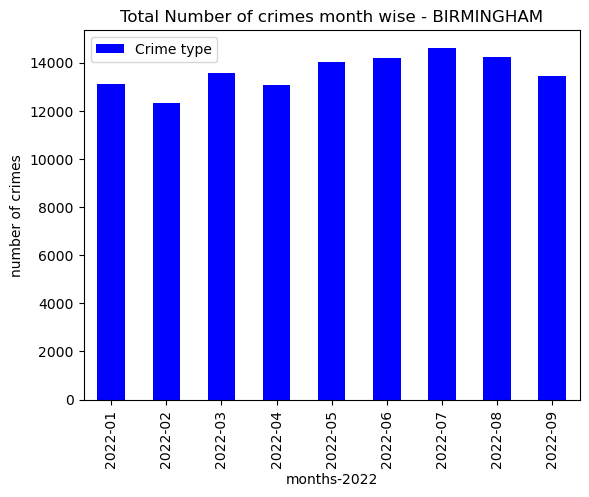

In [42]:
bham_df_plot = bham_df.plot.bar(color = "b")
plt.title("Total Number of crimes month wise - BIRMINGHAM")
plt.xlabel("months-2022")
plt.ylabel("number of crimes")



In [43]:
wham_df = new_crime_data_wham.groupby(["Month"]).agg({"Crime type":"count"})
wham_df

,Crime type
Month,
2022-01,2868
2022-02,2753
2022-03,2989
2022-04,2979
2022-05,3057
2022-06,3082
2022-07,3137
2022-08,3112
2022-09,2981


Text(0, 0.5, 'number of crimes')

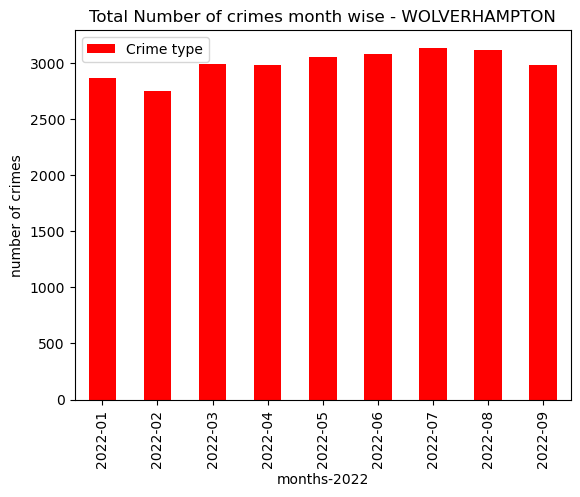

In [44]:
wolverhampton_df_plot = wham_df.plot.bar(color = "r")
plt.title("Total Number of crimes month wise - WOLVERHAMPTON")
plt.xlabel("months-2022")
plt.ylabel("number of crimes")


In [45]:
cov_df = new_crime_data_cov.groupby(["Month"]).agg({"Crime type":"count"})
cov_df

,Crime type
Month,
2022-01,3264
2022-02,3139
2022-03,3426
2022-04,3465
2022-05,3811
2022-06,3576
2022-07,3649
2022-08,3639
2022-09,3412


Text(0, 0.5, 'number of crimes')

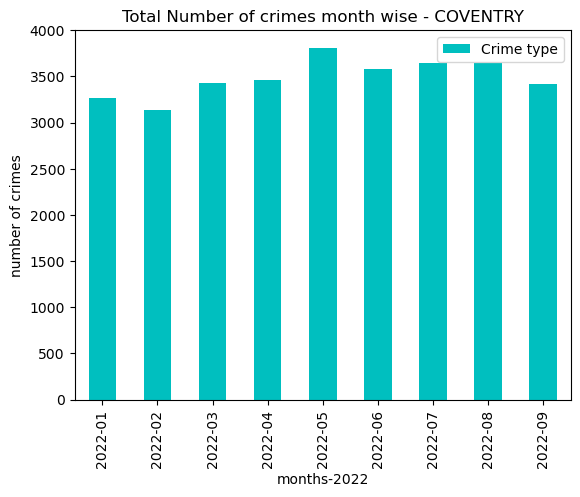

In [46]:
coventry_df_plot = cov_df.plot.bar(color = "c")
plt.title("Total Number of crimes month wise - COVENTRY")
plt.xlabel("months-2022")
plt.ylabel("number of crimes")



In [47]:
sandwell_df = new_crime_data_sand.groupby(["Month"]).agg({"Crime type":"count"})
sandwell_df

,Crime type
Month,
2022-01,3240
2022-02,3163
2022-03,3443
2022-04,3254
2022-05,3654
2022-06,3349
2022-07,3533
2022-08,3258
2022-09,3274


Text(0, 0.5, 'number of crimes')

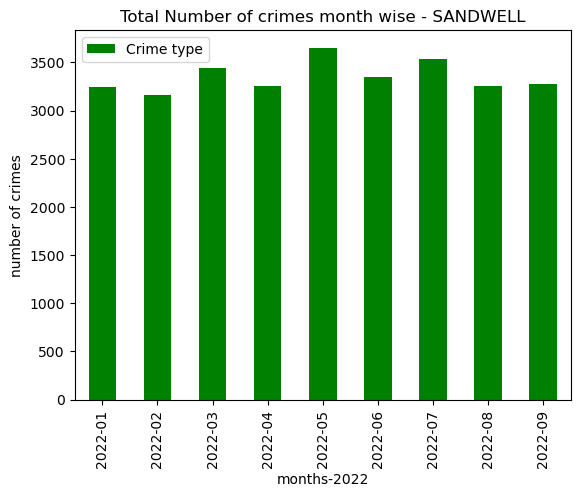

In [48]:
sandwell_df_plot = sandwell_df.plot.bar(color = "g")
sandwell_df_plot
plt.title("Total Number of crimes month wise - SANDWELL")
plt.xlabel("months-2022")
plt.ylabel("number of crimes")



In [49]:
bham_df2 = new_crime_data_bham.groupby(["Month","Crime type"]).agg({"Crime ID":"count"})
bham_df2

Crime ID
Month   Crime type                            
2022-01 Bicycle theft                       70
        Burglary                           912
        Criminal damage and arson          978
        Drugs                              308
        Other crime                        199
...                                        ...
2022-09 Robbery                            380
        Shoplifting                        587
        Theft from the person              201
        Vehicle crime                     1409
        Violence and sexual offences      5841

[117 rows x 1 columns]

<AxesSubplot:xlabel='Month'>

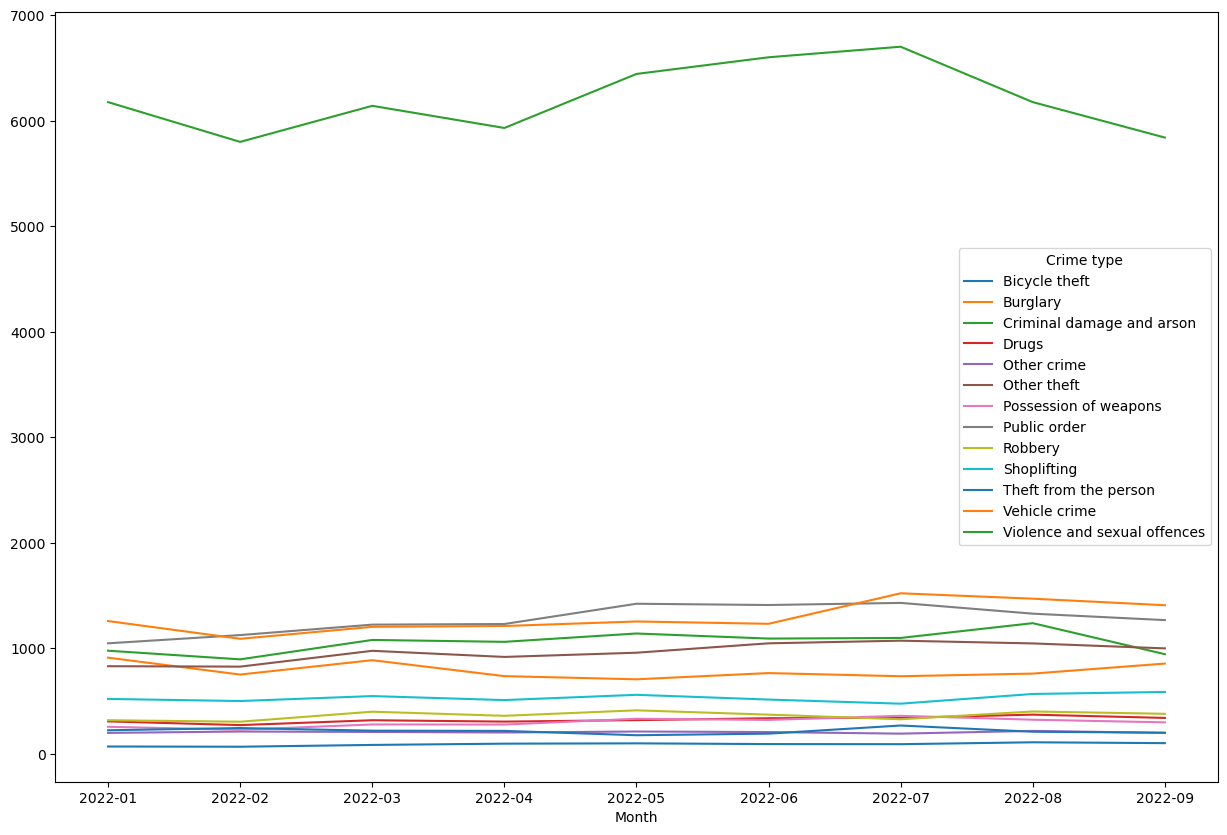

In [57]:
fig, ax=plt.subplots(figsize=(15,10))
new_crime_data_bham.groupby(["Month","Crime type"]).count()["Crime ID"].unstack().plot.line(ax=ax)

Text(0, 0.5, 'Percentage')

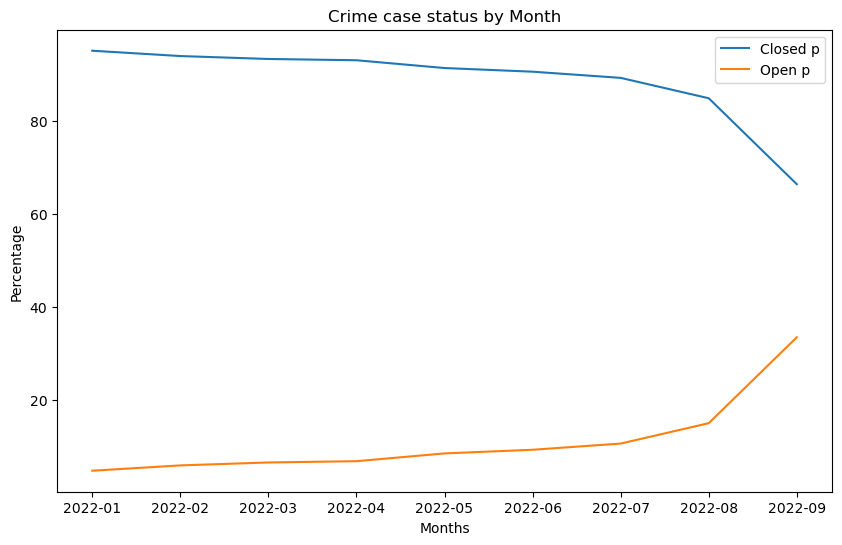

In [59]:
bham_df3 = new_crime_data.groupby(["Month"]).agg({"Closed":sum,"Open":sum})
bham_df3["Closed p"]= (bham_df3["Closed"] / (bham_df3["Closed"] + bham_df3["Open"]))*100
bham_df3["Open p"]= (bham_df3["Open"] / (bham_df3["Closed"] + bham_df3["Open"]))*100
bham_df3.drop(["Closed","Open"],axis=1,inplace=True)
bham_df3
bham_df3.plot(figsize=(10,6))

plt.title("Crime case status by Month")
plt.xlabel("Months")
plt.ylabel("Percentage")



Text(0, 0.5, 'Percentage')

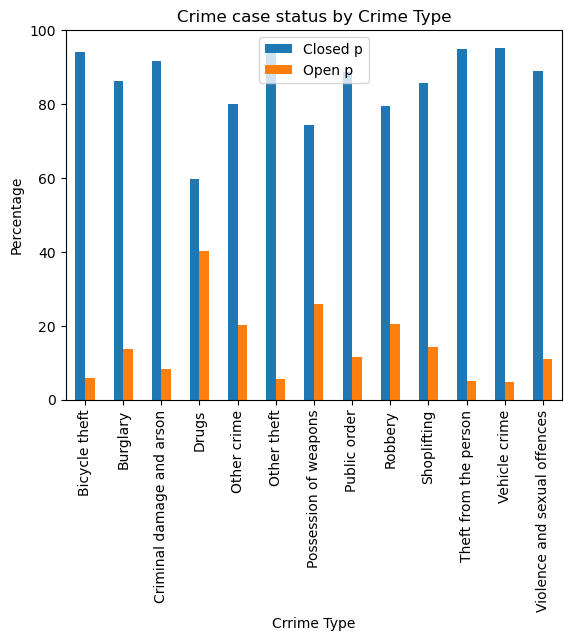

In [60]:
bham_df4 = new_crime_data.groupby(["Crime type"]).agg({"Closed":sum,"Open":sum})
bham_df4["Closed p"]= (bham_df4["Closed"] / (bham_df4["Closed"] + bham_df4["Open"]))*100
bham_df4["Open p"]= (bham_df4["Open"] / (bham_df4["Closed"] + bham_df4["Open"]))*100
bham_df4.drop(["Closed","Open"],axis=1,inplace=True)
bham_df4
#x=np.arange(13)
bham_df4.plot(kind="bar")
plt.title("Crime case status by Crime Type")
plt.xlabel("Crrime Type")
plt.xticks()
plt.ylabel("Percentage")


In [61]:
bham_df5 = new_crime_data.groupby(["Month"]).agg({"Complete with No Suspect":sum,
                                                  "Complete but couldnt prosecute":sum,
                                                  "Actioned or Punished":sum
                                                  })
bham_df5["Complete with No Suspect p"]= (bham_df5["Complete with No Suspect"] / 
                                         (bham_df5["Complete with No Suspect"] + 
                                          bham_df5["Complete but couldnt prosecute"] +
                                          bham_df5["Actioned or Punished"]))*100
bham_df5["Complete but couldnt prosecute p"]= (bham_df5["Complete but couldnt prosecute"] / 
                                         (bham_df5["Complete with No Suspect"] + 
                                          bham_df5["Complete but couldnt prosecute"] +
                                          bham_df5["Actioned or Punished"]))*100
bham_df5["Actioned or Punished p"]= (bham_df5["Actioned or Punished"] / 
                                         (bham_df5["Complete with No Suspect"] + 
                                          bham_df5["Complete but couldnt prosecute"] +
                                          bham_df5["Actioned or Punished"]))*100

bham_df5.drop(["Complete with No Suspect","Complete but couldnt prosecute","Actioned or Punished"],axis=1,inplace=True)
bham_df5
#bham_df5.plot(figsize=(10,6))
#plt.title("Outcome of Crime closed")
#plt.xlabel("Month")
#plt.ylabel("Percentage")


,Complete with No Suspect p,Complete but couldnt prosecute p,Actioned or Punished p
Month,,,
2022-01,43.198751,51.749095,5.052154
2022-02,41.090813,54.517947,4.391240
2022-03,43.758932,52.737983,3.503085
2022-04,44.650309,52.500360,2.849331
2022-05,45.179129,51.445244,3.375628
2022-06,45.084555,51.915655,2.999789
2022-07,46.576143,50.495015,2.928842
2022-08,48.636178,49.480892,1.882931
2022-09,50.144509,47.797489,2.058003


Text(0, 0.5, 'Percentage')

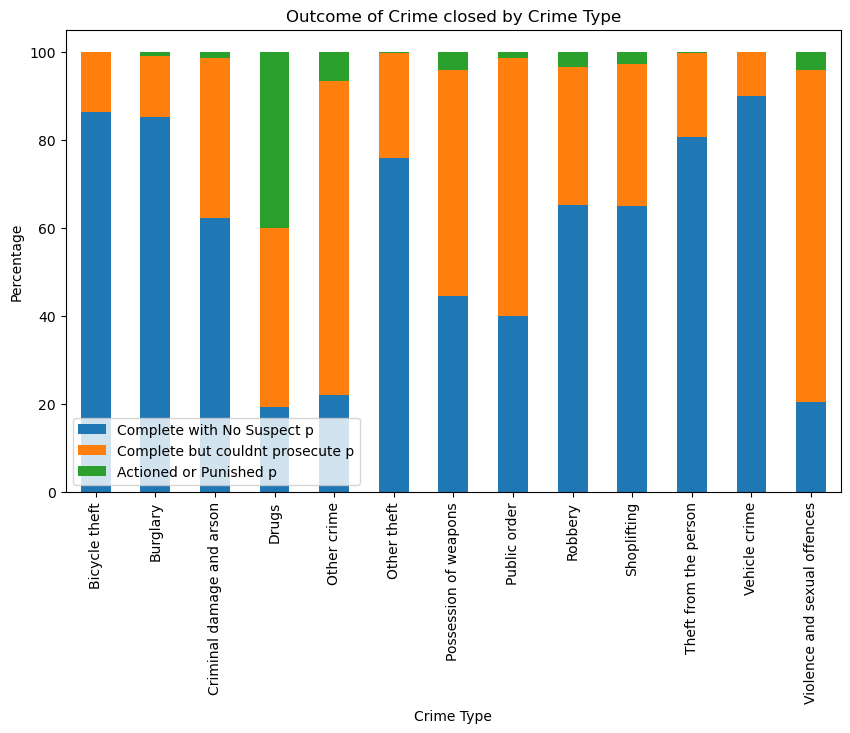

In [62]:
bham_df6 = new_crime_data.groupby(["Crime type"]).agg({"Complete with No Suspect":sum,
                                                  "Complete but couldnt prosecute":sum,
                                                  "Actioned or Punished":sum
                                                  })
bham_df6["Complete with No Suspect p"]= (bham_df6["Complete with No Suspect"] / 
                                         (bham_df6["Complete with No Suspect"] + 
                                          bham_df6["Complete but couldnt prosecute"] +
                                          bham_df6["Actioned or Punished"]))*100
bham_df6["Complete but couldnt prosecute p"]= (bham_df6["Complete but couldnt prosecute"] / 
                                         (bham_df6["Complete with No Suspect"] + 
                                          bham_df6["Complete but couldnt prosecute"] +
                                          bham_df6["Actioned or Punished"]))*100
bham_df6["Actioned or Punished p"]= (bham_df6["Actioned or Punished"] / 
                                         (bham_df6["Complete with No Suspect"] + 
                                          bham_df6["Complete but couldnt prosecute"] +
                                          bham_df6["Actioned or Punished"]))*100

bham_df6.drop(["Complete with No Suspect","Complete but couldnt prosecute","Actioned or Punished"],axis=1,inplace=True)
bham_df6.plot(kind='bar',stacked=True,figsize=(10,6))

plt.title("Outcome of Crime closed by Crime Type")
plt.xlabel("Crime Type")
plt.ylabel("Percentage")
